# Analyzing 2024 NCRs

Notes for future: try to normalize NCRs by number of parts built? Number of MOs?

## Loading and Cleaning Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load all ncr data from 2024
def load_ncr_file(filename): 
    #helper function to load and clean NCR data 
    #input is ncr file name
    #helps to load data from different years
    ncr_df = pd.read_csv(filename)
    ncr_df.columns = ["Number", "Location", "Date", "Source", "NCM Type", "Desc", "Disposition", "Closed", "Disp Entered By", "Product"]
    ncr_df["Part"] = ncr_df.apply(lambda row: row["Product" ].split(" ")[0], axis = 1)
    ncr_df["Month"] = ncr_df.apply(lambda row: row["Date"].split("-")[1], axis = 1).astype(int)
    ncr_df = ncr_df.drop(columns = ['Number', 'Source', 'Closed', 'Product'])
    return ncr_df

NCR24_data = load_ncr_file("2024 NCRs.csv")
NCR23_data = load_ncr_file("2023 NCRs.csv")





In [289]:
#helper functions

def split_dept(dept, df): 
    #helper function to get info from dataframe for specific department
    #inputs are department list (in list even if just one) and full NCR df
    if dept == [118]: 
        new_df = df[df["Market"] == 14]
    else: 
        new_df = df[df["Dept"].isin(dept)]
        new_df = new_df[new_df["Market"] != 14]
    new_df.reset_index(drop = True)
    return new_df

def join_ncr_dept(ncr_df, dept_df):
    #helper function to join a NCR df with the departments df
    #input is the full ncr dataframe, and the full department dataframe
    new_df = pd.merge(ncr_df, dept_df, on = "Part", how = "left")
    new_df["Dept"] = new_df["Dept"].fillna(0).astype(int)
    new_df["Market"] = new_df["Market"].fillna(0).astype(int)
    return new_df

def df_by_month(df):
    #helper function to create counts by month
    #input is the department ncr df
    df_months = df.groupby("Month")["Location"].count().reset_index()
    df_months.columns = ["Month", "NCR Count"]
    df_months = add_missing_months(df_months)
    return df_months

def add_missing_months(df):
    #function to add missing months to a scrap by month dataframe
    #input is a scrap by month dataframe
    #output is same dataframe with 0 values for missing months
    for i in range(1, 13): 
        if (i not in df["Month"].values):
            #print(dict[i])
            df.loc[len(df)] = {"Month Num": i, "NCR Count": 0}
    df = df.sort_values(["Month"], ascending = True)
    return df

In [293]:
#load departments df
departments = pd.read_csv("Item Departments.csv")
departments.columns = ["Part", "Rev",  "Dept", "Market"]
departments = departments.drop(columns = ["Rev"])

#join NCR dfs with departments df
NCR24_data_dept = join_ncr_dept(NCR24_data, departments)
NCR23_data_dept = join_ncr_dept(NCR23_data, departments)

## Looking At Different Departments

Change department here to look at different departments

In [309]:
all_departments = [[106], [108], [112, 113], [114], [116], [118], [121], [124]]
all_departments_dict ={"HSA": [106], "EMA": [108], "I&C" : [112, 113], "Savi": [116],"RR": [118], "Assy": [121], "CB": [124]}  
#all_departments_dict ={"HSA": [106], "I/C" : [112, 113], "Savi": [116],"RR": [118], "Assy": [121]}  

In [311]:
def chart_23_24(df23, df24): 
    #helper function to create side-by-side bar chart monthly dfs of NCR counts for 2023 and 2024
    #inputs are the ncr numbers by month 2023 df and 2024 df
    # Create the figure and axes
    fig, ax = plt.subplots()
    # Set the width of each bar
    bar_width = 0.35
    # Calculate the positions for the bars
    x = df24["Month"]
    x1 = x + bar_width / 2
    x2 = x - bar_width / 2
    # Create the bars
    ax.bar(x1, df24["NCR Count"], width=bar_width, label='2024', color = "lightcoral")
    ax.bar(x2, df23["NCR Count"], width=bar_width, label='2023', color = "royalblue")
    # Set the labels for the x-axis and y-axis
    ax.set_xticks(x)
    ax.set_xticklabels(["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."])
    ax.set_ylabel('NCR Counts')
    plt.title(department_name+ " NCRs by Month")
    plt.legend()
    plt.grid(axis = "y")
    plt.show()

def find_totals(df23, df24): 
    #helper function to calculate and print 2023 and 2024 totals
    #input are the department ncr dataframe for 2023 and 2024
    ncr_2023_total = len(df23)
    ncr_2024_total = len(df24)
    print("2023 " + department_name + " total number of NCRs: ", ncr_2023_total)
    print("2024 " + department_name + " total number of NCRs: ", ncr_2024_total)
    


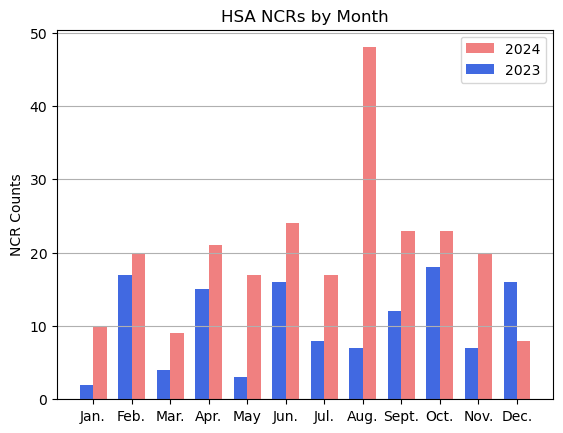

2023 HSA total number of NCRs:  125
2024 HSA total number of NCRs:  247


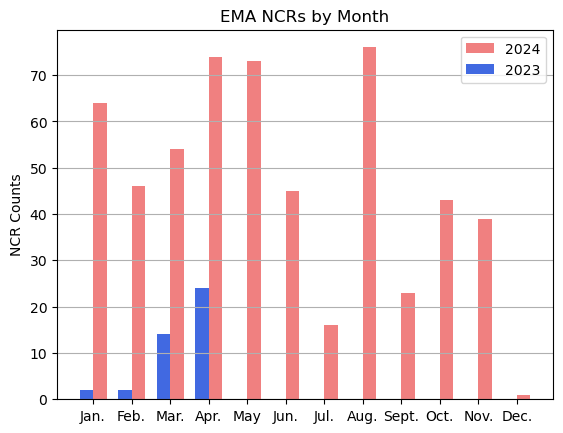

2023 EMA total number of NCRs:  42
2024 EMA total number of NCRs:  554


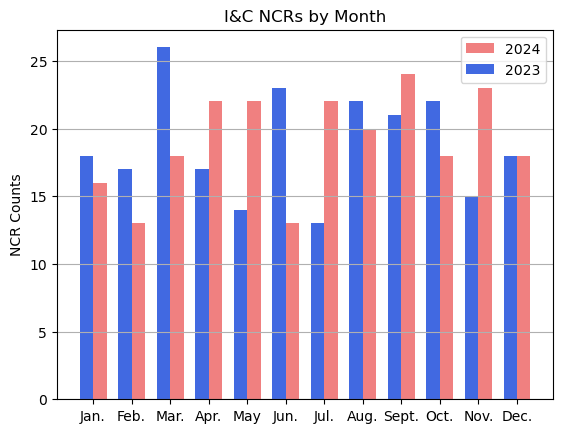

2023 I&C total number of NCRs:  229
2024 I&C total number of NCRs:  234


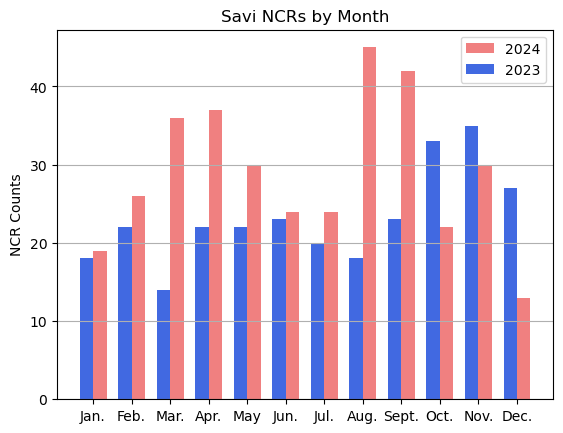

2023 Savi total number of NCRs:  280
2024 Savi total number of NCRs:  359


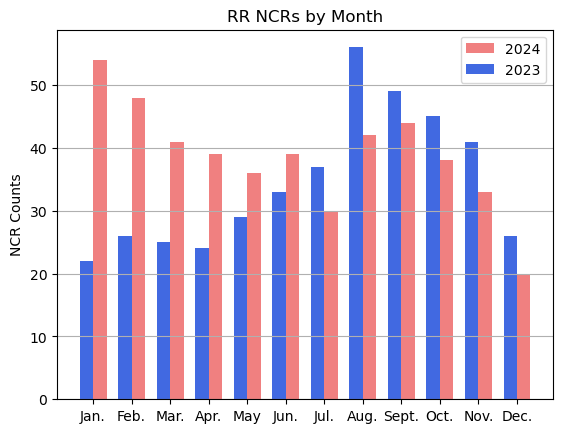

2023 RR total number of NCRs:  417
2024 RR total number of NCRs:  470


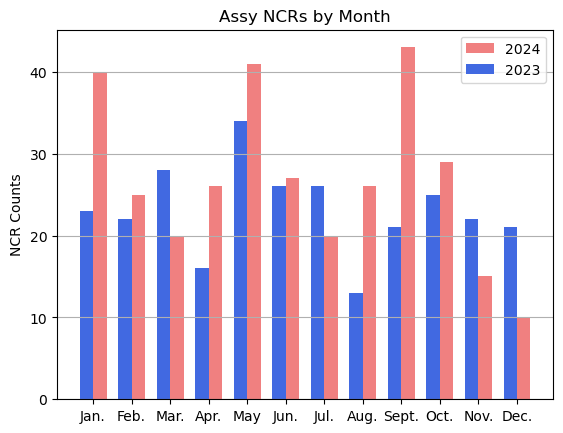

2023 Assy total number of NCRs:  279
2024 Assy total number of NCRs:  325


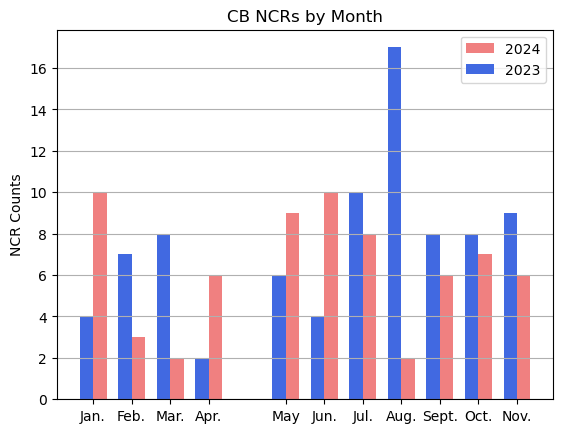

2023 CB total number of NCRs:  91
2024 CB total number of NCRs:  69


In [313]:
# generate bar charts for 2023 and 2024 for all different departments 
for key, value in all_departments_dict.items(): 
    department_name = key
    department = value
    #find NCRs for that department for 2023 and 2024
    dept_ncr24_df = split_dept(department, NCR24_data_dept)
    dept_ncr23_df = split_dept(department, NCR23_data_dept)
    #split NCRs into months
    dept_ncrs_by_month24 = df_by_month(dept_ncr24_df)
    dept_ncrs_by_month23 = df_by_month(dept_ncr23_df)
    #plot 
    chart_23_24(dept_ncrs_by_month23, dept_ncrs_by_month24)
    find_totals(dept_ncr23_df, dept_ncr24_df)
    


In [255]:
department = [112, 113]
department_name = "Inj & Comp" 

#isolate injection compression ncrs
inj_comp24 = split_dept(department, NCR24_data_dept)
inj_comp23 = split_dept(department, NCR23_data_dept)

#split NCRS into months 
ncrs_by_month24 = df_by_month(inj_comp24)
ncrs_by_month23 = df_by_month(inj_comp23)


In [257]:
print(ncrs_by_month24)

    Month  NCR Count
0       1         16
1       2         13
2       3         18
3       4         22
4       5         22
5       6         13
6       7         22
7       8         20
8       9         24
9      10         18
10     11         23
11     12         18


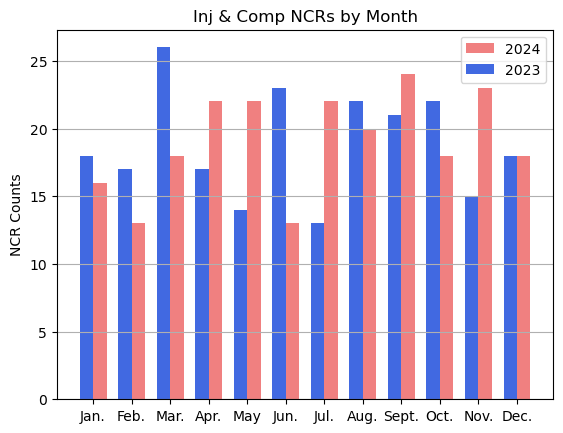

In [259]:
#plot injection compression 23 and 24 ncrs
chart_23_24(ncrs_by_month23, ncrs_by_month24)

In [15]:
find_totals(inj_comp23, inj_comp24)

2023 Inj & Comp total number of NCRs:  229
2024 Inj & Comp total number of NCRs:  234


## Looking at Different Parts

In [18]:
def find_top_parts(df, num, year):
    #helper function to find and plot the parts with the most ncrs from  a df
    new_df = df.groupby("Part")["Location"].count().sort_values(ascending = False).head(num).reset_index()
    new_df.columns = ["Part", "NCR Count"]
    plt.barh(new_df["Part"], new_df["NCR Count"])
    plt.grid(axis = "x")
    plt.xlabel("Number of NCRs")
    plt.title("Top " + str(num) + " " + department_name + " Parts by NCR Count " + str(year))
    


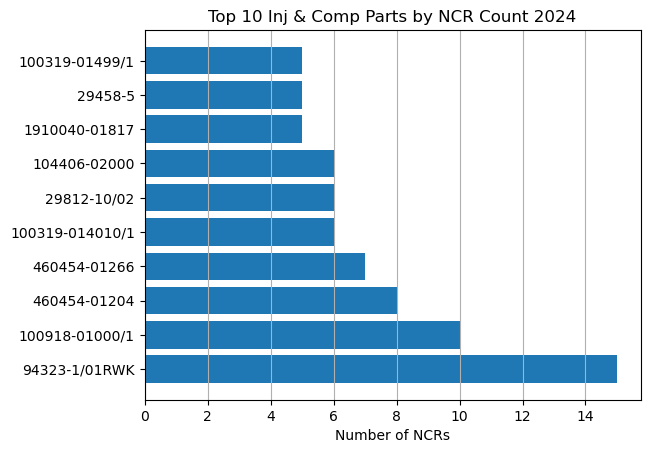

In [19]:
find_top_parts(inj_comp24, 10, 2024)

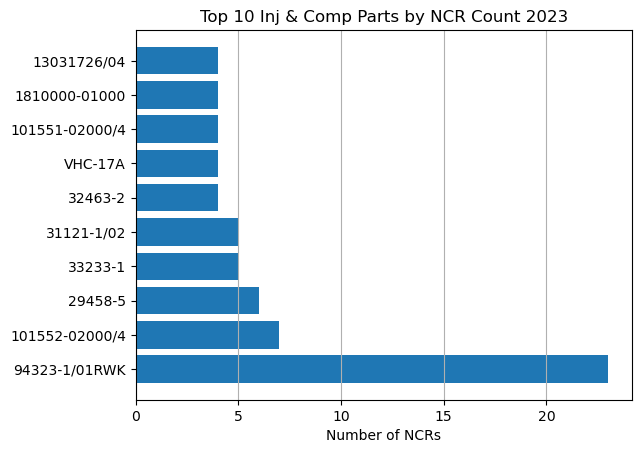

In [20]:
find_top_parts(inj_comp23, 10, 2023)

## Looking at Different Dispositioners